# Indian-Liver-Patient-Classification
______

Dataset : https://archive.ics.uci.edu/ml/datasets/ILPD+(Indian+Liver+Patient+Dataset)

This data set contains 10 variables that are age, gender, total Bilirubin, direct Bilirubin, total proteins, albumin, A/G ratio, SGPT, SGOT and Alkphos.

#### Data Set Information:

This data set contains 416 liver patient records and 167 non liver patient records.The data set was collected from north east of Andhra Pradesh, India. Selector is a class label used to divide into groups(liver patient or not). This data set contains 441 male patient records and 142 female patient records. 

Any patient whose age exceeded 89 is listed as being of age "90".


#### Attribute Information:

1. Age	Age of the patient 
2. Gender	Gender of the patient 
3. TB	Total Bilirubin 
4. DB	Direct Bilirubin 
5. Alkphos Alkaline Phosphotase 
6. Sgpt Alamine Aminotransferase 
7. Sgot Aspartate Aminotransferase 
8. TP	Total Protiens 
9. ALB	Albumin 
10. A/G Ratio	Albumin and Globulin Ratio 
11. Selector field used to split the data into two sets (labeled by the experts) 

In [3]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [4]:
# read .csv from provided dataset
csv_filename="Indian Liver Patient Dataset (ILPD).csv"

# df=pd.read_csv(csv_filename,index_col=0)
df=pd.read_csv(csv_filename, 
              names=["Age", "Gender" , "TB" , "DB" , "Alkphos" , "Sgpt",
                     "Sgot" , "TP" , "ALB" , "A/G", "Selector" ])

In [5]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [6]:
df.tail()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [7]:
#Convert Gender,Selector to numbericals
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df.Gender)
 
df['Selector'] = le.fit_transform(df.Selector)
#Get binarized gender columns
#df['Gender'] = pd.get_dummies(df.Gender)

In [8]:
df.tail()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,1
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,0
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,0
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,0
582,38,1,1.0,0.3,216,21,24,7.3,4.4,1.50,1


In [9]:
features=(list(df.columns[:-1]))

In [10]:
X = df[features]
y = df['Selector']

In [11]:
X.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40


In [12]:
"""
from sklearn.preprocessing import StandardScaler
# Scaling the features using StandardScaler:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X = X_scaler.fit_transform(X)
y = y_scaler.fit_transform(y)
X = X_scaler.transform(X)
y = y_scaler.transform(y)
"""

'\nfrom sklearn.preprocessing import StandardScaler\n# Scaling the features using StandardScaler:\nX_scaler = StandardScaler()\ny_scaler = StandardScaler()\nX = X_scaler.fit_transform(X)\ny = y_scaler.fit_transform(y)\nX = X_scaler.transform(X)\ny = y_scaler.transform(y)\n'

In [13]:
from sklearn.preprocessing import Imputer
X = Imputer().fit_transform(X)

In [14]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [16]:
print (X_train.shape, y_train.shape)

(349, 10) (349,)


### Feature importances with forests of trees

This examples shows the use of forests of trees to evaluate the importance of features on an artificial classification task. The red bars are the feature importances of the forest, along with their inter-trees variability.

Feature ranking:
1. feature 4 - Alkphos (0.119578) 
2. feature 6 - Sgot (0.118929) 
3. feature 5 - Sgpt (0.115570) 
4. feature 0 - Age (0.115264) 
5. feature 2 - TB (0.111479) 
6. feature 3 - DB (0.102925) 
7. feature 8 - ALB (0.099643) 
8. feature 9 - A/G (0.097362) 
9. feature 7 - TP (0.093450) 
10. feature 1 - Gender (0.025800) 


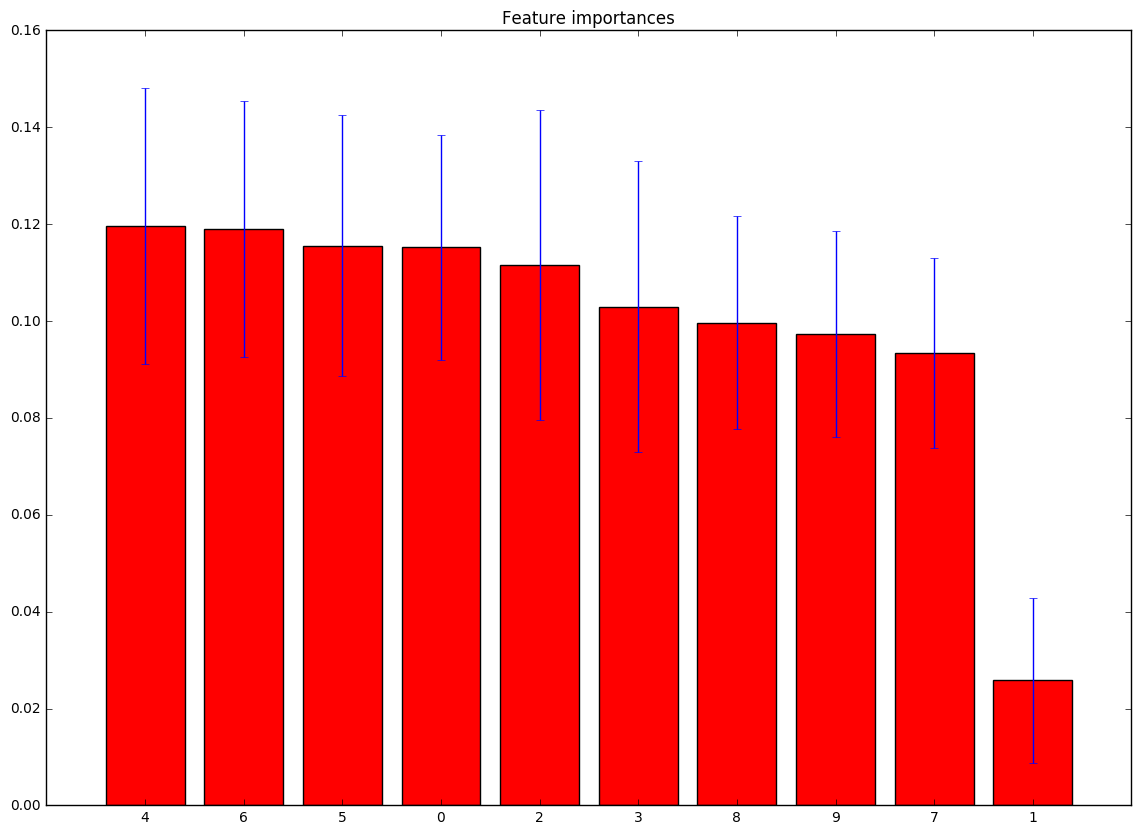

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d - %s (%f) " % (f + 1, indices[f], features[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [18]:
importances[indices[:5]]

array([ 0.11957832,  0.11892912,  0.11556982,  0.11526371,  0.11147937])

In [19]:
for f in range(5):
    print("%d. feature %d - %s (%f)" % (f + 1, indices[f], features[indices[f]] ,importances[indices[f]]))

1. feature 4 - Alkphos (0.119578)
2. feature 6 - Sgot (0.118929)
3. feature 5 - Sgpt (0.115570)
4. feature 0 - Age (0.115264)
5. feature 2 - TB (0.111479)


In [20]:
best_features = []
for i in indices[:5]:
    best_features.append(features[i])

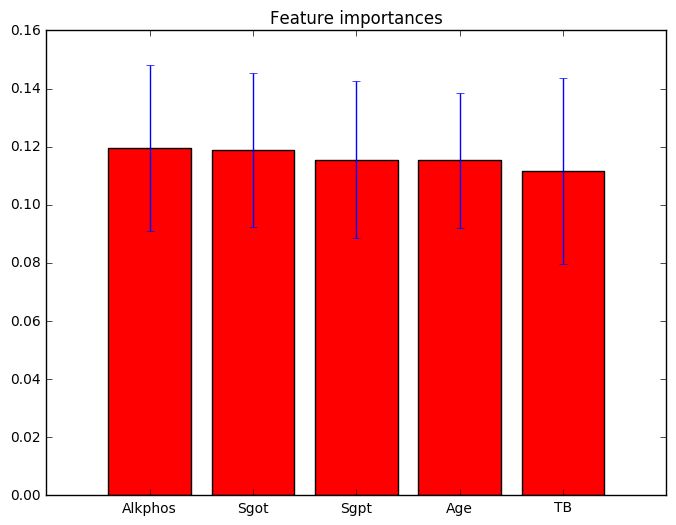

In [21]:
# Plot the top 5 feature importances of the forest
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.title("Feature importances")
plt.bar(range(5), importances[indices][:5], 
       color="r",  yerr=std[indices][:5], align="center")
plt.xticks(range(5), best_features)
plt.xlim([-1, 5])
plt.show()

# Decision Tree accuracy and time elapsed caculation

In [22]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.675213675214
time elapsed:  0.01000070571899414


## cross validation for DT

In [23]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X, y, cv=3)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.64102564  0.67179487  0.60103627]
0.63795226075
time elapsed:  0.029001712799072266


### Tuning our hyperparameters using GridSearch

In [25]:
from sklearn.metrics import classification_report

pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion='entropy'))
])

parameters = {
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (2, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='f1')
grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)

print (classification_report(y_test, predictions))

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    7.4s finished


Best score: 0.466
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 2
	clf__min_samples_split: 2
             precision    recall  f1-score   support

          0       0.73      0.81      0.77       167
          1       0.36      0.27      0.31        67

avg / total       0.63      0.65      0.64       234



# Random Forest accuracy and time elapsed caculation

In [26]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.717948717949
time elapsed:  0.5140295028686523


## cross validation for RF

In [27]:
tt2=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X, y, cv=3)
print (scores)
print (scores.mean())
tt3=time()
print ("time elapsed: ", tt3-tt2)


cross result========
[ 0.7025641   0.68717949  0.72020725]
0.703316947877
time elapsed:  1.4800846576690674


### Tuning Models using GridSearch

In [28]:

pipeline2 = Pipeline([
('clf', RandomForestClassifier(criterion='entropy'))
])

parameters = {
    'clf__n_estimators': (5, 25, 50, 100),
    'clf__max_depth': (5, 25 , 50),
    'clf__min_samples_split': (2, 5, 10),
    'clf__min_samples_leaf': (1, 2, 3)
}

grid_search = GridSearchCV(pipeline2, parameters, n_jobs=-1, verbose=1, scoring='accuracy', cv=3)

grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)

print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

predictions = grid_search.predict(X_test)
print ('Accuracy:', accuracy_score(y_test, predictions))
print (classification_report(y_test, predictions))
    

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:   22.7s finished


Best score: 0.734
Best parameters set:
	clf__max_depth: 50
	clf__min_samples_leaf: 1
	clf__min_samples_split: 2
	clf__n_estimators: 25
Accuracy: 0.67094017094
             precision    recall  f1-score   support

          0       0.73      0.85      0.79       167
          1       0.38      0.22      0.28        67

avg / total       0.63      0.67      0.64       234



# Naive Bayes accuracy and time elapsed caculation


In [29]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.713675213675
time elapsed:  0.07000398635864258


## cross-validation for NB

In [30]:
tt4=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=3)
print (scores)
print (scores.mean())
tt5=time()
print ("time elapsed: ", tt5-tt4)

cross result========
[ 0.71282051  0.71282051  0.71502591]
0.713555644126
time elapsed:  0.029001712799072266


# KNN accuracy and time elapsed caculation

In [31]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier(n_neighbors=3)
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.679487179487
time elapsed:  0.011000633239746094


## cross validation for KNN

In [32]:
tt6=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt7=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.66101695  0.64957265  0.63793103  0.57758621  0.72413793]
0.650048954228
time elapsed:  0.03300189971923828


### Fine tuning the model using GridSearch

In [33]:
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

knn = KNeighborsClassifier()

parameters = {'n_neighbors':[1,10]}

grid = grid_search.GridSearchCV(knn, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print ('Best score: %0.3f' % grid.best_score_)

print ('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid.predict(X_test)
print( classification_report(y_test, predictions))

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    4.2s finished


Best score: 0.685
Best parameters set:
	n_neighbors: 1
             precision    recall  f1-score   support

          0       0.75      0.74      0.74       167
          1       0.37      0.39      0.38        67

avg / total       0.64      0.64      0.64       234



# SVM accuracy and time elapsed caculation

In [34]:
t7=time()
print ("SVM")

svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.717948717949
time elapsed:  0.14200806617736816


## cross validation for SVM

In [35]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc,X,y, cv=5)
print (scores)
print (scores.mean())
tt8=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.71186441  0.70940171  0.71551724  0.71551724  0.71551724]
0.713563568064
time elapsed:  47.82873582839966


# SVM with RBF kernel accuracy and time elapsed caculation

In [37]:
t7=time()
print ("SVM")

svc_r = SVC(kernel='rbf')
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.717948717949
time elapsed:  0.03200173377990723


## cross validation for SVM

In [38]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc_r,X,y, cv=5)
print (scores)
print (scores.mean())
tt8=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.71186441  0.70940171  0.71551724  0.71551724  0.71551724]
0.713563568064
time elapsed:  35752.70882368088


---